Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Cleversys_Parser as cp
import behavior_miniscope as bm

Point to the path containing your cleversys .txt file

In [2]:
cleversys_txt = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\test\\alignment_script\\2022_06_21\\211220 social memory pairs 1-6_1_TCR.txt"
print(cleversys_txt)

\\penc8.rc.int.colorado.edu\DonaldsonLab\Sheeran\miniscope_files\test\alignment_script\2022_06_21\211220 social memory pairs 1-6_1_TCR.txt


Parse cleversys .txt file into frame-by-frame df containing tracked data of interest (can change which columns are included in the ms_parse fxn in timestamp_align.py).

This df will be 1) imported into Bento for alignment with behavioral/neural data (e.g., videos, manual annotations, other sources of data input) and incorporation into a .annot file, and 2) also aligned with neural data in this notebook to generate some more frame-by-frame booleans for input into Bento (and, if you prefer, you can use this df to run all of your analysis outside of Bento)

In [3]:
#will take a bit of time
parsed_cs = bm.ms_parse(cleversys_txt, "cam1") #the second argument is the name of the minicam whose video you analyzed in cleversys
print(parsed_cs)

        CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  DistanceSum(mm)_novel  \
0             503.0        160.0      466.0      170.0               0.000000   
1             503.0        160.0      537.0      155.0               0.000000   
2             503.0        160.0      537.0      155.0               0.000000   
3             503.0        160.0      540.0      160.0               0.000000   
4             503.0        160.0      537.0      155.0               0.000000   
...             ...          ...        ...        ...                    ...   
323671        807.0        236.0      800.0      210.0           28410.072169   
323672        806.0        235.0      795.0      210.0           28410.706379   
323673        805.0        236.0      795.0      210.0           28411.307304   
323674        805.0        236.0      795.0      210.0           28411.877879   
323675        805.0        236.0      795.0      210.0           28412.363219   

       [Center_Areas]_novel

Import and align all feeds' timestamp files

In [4]:
#point to paths containing timestamp files from each feed
ts_dir = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\test\\alignment_script\\2022_06_21\\18_25_10"

scope_dir = os.path.join(ts_dir, "My_V4_Miniscope\\timeStamps.csv")
cam1_dir = os.path.join(ts_dir, "MiniCam1\\timeStamps_cam1.csv")
cam2_dir = os.path.join(ts_dir, "MiniCam2\\timeStampscam2.csv")

#load timestamp files
scope_ts = pd.read_csv(scope_dir)
cam1_ts = pd.read_csv(cam1_dir)
cam2_ts = pd.read_csv(cam2_dir)

#align files, using miniscope frames as reference
aligned_ts = bm.align_feeds(scope_dir,
                            cam1_dir,
                           cam2_dir)

print(aligned_ts)

      Frame Number  Time Stamp (ms)  Frame Number_cam1  Frame Number_cam2
0                0               -4                  0                  0
1                1               37                  2                  2
2                2               66                  3                  4
3                3               95                  5                  5
4                4              132                  6                  7
...            ...              ...                ...                ...
9070          9070           304810              14307              14307
9071          9071           304843              14309              14309
9072          9072           304877              14310              14311
9073          9073           304910              14312              14312
9074          9074           304945              14313              14314

[9075 rows x 4 columns]


Align the timestamps to your parsed cleversys output

In [5]:
cs_ts = bm.align_cleversys(parsed_cs, aligned_ts)
cs_ts

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),DistanceSum(mm)_novel,[Center_Areas]_novel,[Nose_Areas]_novel,CenterX(mm)_partner,CenterY(mm)_partner,EventRule1,...,Frame Number_cam1,Time,distance_to_partner,distance_to_novel,distance_traveled,distance_traveled_partner,distance_traveled_novel,Frame Number,Time Stamp (ms),Frame Number_cam2
0,503.0,160.0,466.0,170.0,0.000000,"[left,left chamber]","[left,left chamber]",776.0,240.0,0,...,390,0.033367,284.480228,405.764710,0.0,0.0,0.000000,247,8299,390
1,503.0,160.0,537.0,155.0,0.000000,"[left,left chamber]","[left,left chamber]",776.0,240.0,0,...,391,0.066733,284.480228,405.034566,0.0,0.0,1.414214,248,8330,392
2,503.0,160.0,540.0,160.0,0.000000,"[left,left chamber]","[left,left chamber]",776.0,240.0,0,...,393,0.133467,284.480228,404.793775,0.0,0.0,1.000000,249,8365,393
3,503.0,160.0,537.0,155.0,0.000000,"[left,left chamber]","[left,left chamber]",775.0,240.0,0,...,395,0.200200,283.520722,404.793775,0.0,1.0,1.000000,250,8399,395
4,503.0,160.0,537.0,155.0,0.000000,"[left,left chamber]","[left,left chamber]",775.0,240.0,0,...,396,0.233567,283.520722,404.793775,0.0,0.0,0.000000,251,8430,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,168.0,233.0,198.0,220.0,4324.394613,[],[],738.0,207.0,1,...,14307,464.397731,570.592674,56.356011,0.0,1.0,0.000000,9070,304810,14307
8824,167.0,233.0,198.0,223.0,4324.394613,[],[],738.0,207.0,1,...,14309,464.464464,571.591637,55.470713,0.0,0.0,0.000000,9071,304843,14309
8825,167.0,233.0,198.0,223.0,4324.394613,[],[],738.0,207.0,1,...,14310,464.497831,571.591637,55.470713,0.0,0.0,0.000000,9072,304877,14311
8826,168.0,233.0,198.0,223.0,4324.394613,[],[],738.0,207.0,1,...,14312,464.564565,570.592674,55.009090,0.0,0.0,0.000000,9073,304910,14312


Spatially bin the locations in the PPT chamber the test animal goes to (for place cell and possibly other analysis)
(50 mm is proabably a good bin size)

In [6]:
y = cs_ts['NoseY(mm)'].tolist()
maxY = max(y)

minY = cs_ts['NoseY(mm)'].min()
miny = min(y)
Ylim = [minY, maxY]
bin_size = 50

nbinsY = int(np.round(np.diff(Ylim)[0] / bin_size))

print(Ylim)
print(nbinsY)

ybins = np.linspace(minY,maxY,(nbinsY+1))

print(ybins)

[99.0, 271.0]
3
[ 99.         156.33333333 213.66666667 271.        ]


In [7]:
x = cs_ts['NoseX(mm)'].tolist()
maxX = max(x)
minX = min(x)
Xlim = [minX, maxX]
nbinsX = int(np.round(np.diff(Xlim)[0] / bin_size)) #may need to make this nbinsx + 1 to actually get the correct # of bins?

xbins = np.linspace(minX,maxX,(nbinsX+1))

print(nbinsX)

print(xbins)

bins = [ybins, xbins]
print(bins)

16
[ 56.    105.875 155.75  205.625 255.5   305.375 355.25  405.125 455.
 504.875 554.75  604.625 654.5   704.375 754.25  804.125 854.   ]
[array([ 99.        , 156.33333333, 213.66666667, 271.        ]), array([ 56.   , 105.875, 155.75 , 205.625, 255.5  , 305.375, 355.25 ,
       405.125, 455.   , 504.875, 554.75 , 604.625, 654.5  , 704.375,
       754.25 , 804.125, 854.   ])]


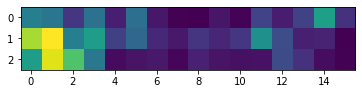

In [9]:
space_bins = bm.space_bin(cs_ts, 50, show_plot = True) #I think this plot is the occupancy plot per bin..?

In [10]:
space_bins

(array([[322., 293., 124., 279.,  72., 273.,  57.,  14.,  11.,  54.,  17.,
         157.,  70., 154., 417., 116.],
        [637., 732., 323., 414., 148., 254.,  93.,  60., 123.,  88., 126.,
         373., 181.,  75.,  84.,  13.],
        [416., 698., 533., 299.,  33.,  50.,  61.,  24.,  77.,  48.,  43.,
          46., 179., 114.,  35.,  15.]]),
 array([ 99.        , 156.33333333, 213.66666667, 271.        ]),
 array([ 56.   , 105.875, 155.75 , 205.625, 255.5  , 305.375, 355.25 ,
        405.125, 455.   , 504.875, 554.75 , 604.625, 654.5  , 704.375,
        754.25 , 804.125, 854.   ]),
 [array([ 99.        , 156.33333333, 213.66666667, 271.        ]),
  array([ 56.   , 105.875, 155.75 , 205.625, 255.5  , 305.375, 355.25 ,
         405.125, 455.   , 504.875, 554.75 , 604.625, 654.5  , 704.375,
         754.25 , 804.125, 854.   ])])

In [11]:
yedge = space_bins[-1][0]
xedge = space_bins[-1][1]

Make df with rows = miniscope frames, columns = each spatial bin, and values = boolean of whether the animal is in each bin at each frame

In [12]:
##replace any nan values for nose position (i think just a dropped position by cleversys) with the previous row's value 
Ynans = cs_ts.loc[pd.isna(cs_ts["NoseY(mm)"]), :].index
Xnans = cs_ts.loc[pd.isna(cs_ts["NoseY(mm)"]), :].index

for i in range(0,len(Ynans)):
    yn_indx = Ynans[i]
    prev_yindx = (yn_indx-1)
    cs_ts.at[yn_indx, "NoseY(mm)"] = cs_ts.at[prev_yindx, "NoseY(mm)"]

for j in range(0,len(Xnans)):
    xn_indx = Xnans[j]
    prev_xindx = (xn_indx-1)
    cs_ts.at[xn_indx, "NoseX(mm)"] = cs_ts.at[prev_xindx, "NoseX(mm)"]
    
    
##determine which x and which y bin the animal is in in each frame (=row of cs_ts): 
yloop_leng = (len(yedge)-1)
xloop_leng = (len(xedge)-1)

ybins = {}
ybin_col = []

xbins = {}
xbin_col = []

for value in cs_ts["NoseY(mm)"]:
    for m in range(0,yloop_leng):
        yledge = yedge[m]
        yredge = yedge[m+1]
        if value >= yledge and value < yredge:
            ybin_col.append(m)
        elif m == (yloop_leng-1) and value == yredge:
            ybin_col.append(yloop_leng-1)

            
#issue 220826: xbin_col is dropping a few rows for some reason -- need to figure out
#220904: restarted kernel and reran code - not dropping rows anymore..?
for value in cs_ts["NoseX(mm)"]:
    for m in range(0,xloop_leng):
        xledge = xedge[m]
        xredge = xedge[m+1]
        if value >= xledge and value < xredge:
            xbin_col.append(m)
        elif m == (xloop_leng-1) and value == xredge:
            xbin_col.append(xloop_leng-1) 

In [13]:
##next, append xbin_col and ybin_col to cs_ts

cs_ts['xbin'] = xbin_col
cs_ts['ybin'] = ybin_col

print(cs_ts) 


      CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  DistanceSum(mm)_novel  \
0           503.0        160.0      466.0      170.0               0.000000   
1           503.0        160.0      537.0      155.0               0.000000   
2           503.0        160.0      540.0      160.0               0.000000   
3           503.0        160.0      537.0      155.0               0.000000   
4           503.0        160.0      537.0      155.0               0.000000   
...           ...          ...        ...        ...                    ...   
8823        168.0        233.0      198.0      220.0            4324.394613   
8824        167.0        233.0      198.0      223.0            4324.394613   
8825        167.0        233.0      198.0      223.0            4324.394613   
8826        168.0        233.0      198.0      223.0            4324.394613   
8827        169.0        233.0      198.0      223.0            4324.394613   

     [Center_Areas]_novel   [Nose_Areas]_novel  Cen

In [14]:
#get number of bins produced above
nybins = (len(yedge)-1)
nxbins = (len(xedge)-1)

#create structure with every possible combination of values for x and y bins,
#and order those combinations as all x, then all y (i.e., [0,0], [0,1], [0,2]... [8,0], [8,1]...)

bins_2d = []

xbin_vals = range(len(xedge))
ybin_vals = range(len(yedge))
for n in xbin_vals:
    for m in ybin_vals:
        x = str(xbin_vals[n])
        y = str(ybin_vals[m])
        xy_list = [x,y]
        xy = ','.join(xy_list)
        bins_2d.append(xy)
        
#        bins_2d.append((n,m))




#generate new column of cs_ts called 2D_bin, write for loop going through xbin and ybin columns and 
#assigning value of each row as ([xbin_val, ybin_val]) 
#(in identical format to the array created in previous step of all possible bins)

twod_bins = []

mnop = range(len(xbin_col))
for n in mnop:
    x = str(xbin_col[n])
    y = str(ybin_col[n])
    xy_list = [x,y]
    xy = ','.join(xy_list)
    twod_bins.append(xy)

cs_ts['2D_bin'] = twod_bins
    
#create empty df with columns = the array of all possible bins and rows = miniscope frames
occ_df = pd.DataFrame({"frame":cs_ts["Frame Number"]})
for i in range(len(bins_2d)):
    col_name = bins_2d[i]
    occ_df.loc[:,col_name] = 0

#populate empty df with binaries of what 2D_bin was generated for cs_ts (so value is either 0 or 1)
nrow = range(len(cs_ts))
for i in nrow:
    dd_bin = cs_ts["2D_bin"][i]
    occ_df.loc[i, dd_bin] = 1
    
#occ_df is now the df with the boolean for each spatial bin on a frame-by-frame basis

In [15]:
occ_df

,frame,"0,0","0,1","0,2","0,3","1,0","1,1","1,2","1,3","2,0",...,"14,2","14,3","15,0","15,1","15,2","15,3","16,0","16,1","16,2","16,3"
0,247,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,248,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,249,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,251,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,9070,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8824,9071,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8825,9072,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8826,9073,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#check correct binning by column, e.g.,
occ_df["2,2"]

0       0
1       0
2       0
3       0
4       0
       ..
8823    1
8824    1
8825    1
8826    1
8827    1
Name: 2,2, Length: 8828, dtype: int64

In [ ]:
#first part (above) - make the boolean for spatial bins -- done as of 220904 besides (2)

#1) define bins
    #doing this based on animal's position. in my experience, animals will touch each wall during their behavior,
    #so i am using their max nose position to define the bounds of the chamber. From cleversys, the x length
    #of the chamber should be identical between sessions (if you set it correctly) but the y length may differ
    #given slight variations in the distortion of the camera
    #plan to use the same number of bins across sessoins, bc we will output the total number of bins the animal went into to
    #get a vague sense of whether the animal fully explored the space or not
    
#2) filter occupancy out by a velocity threshold

#3) frame-by-frame boolean for bin occupancy

In [ ]:
#second part - per AK, for loading into bento (have not yet started as of 220904)

#"organize your bin "bouts" into a struct with structure bouts.Ch1.(bin_ID) 
# [to] be able to pass that struct to Bento's saveAnnot function to output them in a .annot format 
# that could automatically be loaded into Bento

In case you want to analyze outside of Bento: slicing out the miniscope frames during partner/novel social interaction (xreference to your minian .mat file for analysis)

In [ ]:
#slice out the miniscope frames during which the test animal was interacting with either the novel or partner animal

interact_frames = cs_ts[['Frame Number','huddle_novel',
                         'huddle_partner',
                         'novel_dist_less_10cm',
                         'partner_dist_less_10cm',
                         'distance_to_novel',
                         'distance_to_partner']]

interact_frames

nhuddle_frames = interact_frames[interact_frames['huddle_novel']==1]
nhuddle_frames = nhuddle_frames[['Frame Number', 'huddle_novel']]

phuddle_frames = interact_frames[interact_frames['huddle_partner']==1]
phuddle_frames = phuddle_frames[['Frame Number', 'huddle_partner']]

ninteract_frames = interact_frames[interact_frames['novel_dist_less_10cm']==1]
ninteract_frames = ninteract_frames[['Frame Number', 'novel_dist_less_10cm']]

pinteract_frames = interact_frames[interact_frames['partner_dist_less_10cm']==1]
pinteract_frames = pinteract_frames[['Frame Number', 'partner_dist_less_10cm']]